In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 198MB/s]
100% 1.06G/1.06G [00:05<00:00, 198MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()
model.add(Conv2D(40, kernel_size=(3,3), padding="valid", input_shape=(256,256,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding="valid", strides=2))

model.add(Conv2D(80, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding="valid", strides=2))

model.add(Conv2D(160,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding="valid", strides=2))

model.add(Flatten())

model.add(Dense(130, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(65, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))




In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [9]:
from keras import callbacks
early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Metric to monitor (validation loss)
        patience=10,          # Number of epochs with no improvement to wait
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=True,# Restore best model weights when stopped
    )


In [10]:
history=model.fit(train_ds, validation_data=validation_ds,epochs=50, callbacks=early_stopping )

Epoch 1/50
625/625 [==============================] - 102s 138ms/step - loss: 1.8771 - accuracy: 0.5577 - val_loss: 0.7249 - val_accuracy: 0.5894
Epoch 2/50
625/625 [==============================] - 85s 135ms/step - loss: 0.6293 - accuracy: 0.6598 - val_loss: 0.6826 - val_accuracy: 0.5986
Epoch 3/50
625/625 [==============================] - 89s 140ms/step - loss: 0.5609 - accuracy: 0.7117 - val_loss: 0.5466 - val_accuracy: 0.7146
Epoch 4/50
625/625 [==============================] - 87s 139ms/step - loss: 0.4807 - accuracy: 0.7556 - val_loss: 0.4772 - val_accuracy: 0.7752
Epoch 5/50
625/625 [==============================] - 88s 140ms/step - loss: 0.4258 - accuracy: 0.7862 - val_loss: 0.6139 - val_accuracy: 0.7450
Epoch 6/50
625/625 [==============================] - 87s 139ms/step - loss: 0.3941 - accuracy: 0.8075 - val_loss: 0.4185 - val_accuracy: 0.8070
Epoch 7/50
625/625 [==============================] - 88s 140ms/step - loss: 0.3328 - accuracy: 0.8406 - val_loss: 1.1177 - val_a

In [15]:
 history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
import matplotlib.pyplot as plt

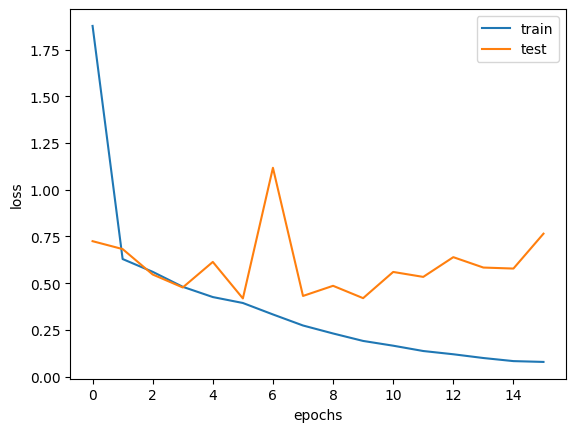

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","test"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

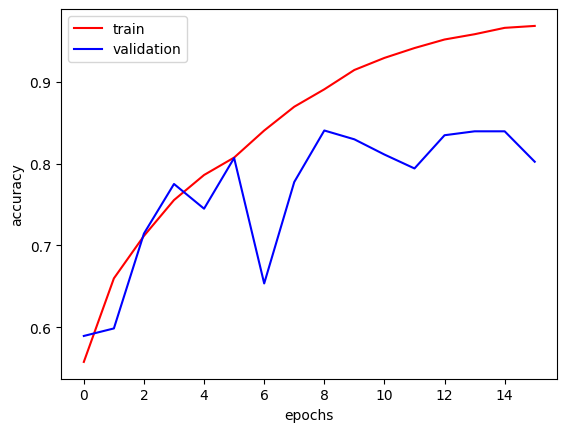

In [23]:
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [24]:
import cv2
test_img = cv2.imread("/content/test.jpeg")

In [37]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)


1/1 [==============================] - 0s 22ms/step


array([[2.3872995e-23]], dtype=float32)

In [39]:
test_img = cv2.imread("/content/test2.jpeg")
test_img= cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)